# Predicting AirBnB Review Scores: First Model

Names:
- Artur Rodrigues, arodrigues (at) ucsd (dot) edu 
- Doanh Nguyen, don012 (at) ucsd (dot) edu 
- Ryan Batubara, rbatubara (at) ucsd (dot) edu

## Environment Setup and Package Imports

All packages used in this project are available on Google Colab. The main packages used are:
- matplotlib
- pandas
- regex
- sklearn
- numpy
- seaborn
- plotly
- collections
- itertools
- ast

The data is taken from [Inside AirBnB](https://insideairbnb.com/get-the-data/), but we have combined them into one csv compressed as a 7z file [here](https://drive.google.com/file/d/1DwNaHBBgTesytLoGn23QZMURfK41Du2K/view?usp=sharing) (requires a UCSD account to access, see why below). The data dictionary for this can be found at [Inside AirBnB data dictionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?gid=1322284596#gid=1322284596). It is too large to copy here.

In [45]:
# Main data libraries
import pandas as pd
import numpy as np

# Plotting and dislpay imports
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from IPython.display import display, Markdown

# Data processing imports
import regex as re
import ast
from itertools import chain
from collections import Counter

In [46]:
# sklearn imports
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Table of Contents

To summarize, we plan to predict the review scores of a given AirBnB listing given a large number of input features. In this notebook, we do some feature engineering to train a basic regression model to act as a baseline for a better, second model.

This first model notebook will be split into three parts:

- [Data Preprocessing](#data-preprocessing), where we import and process the data.
- [Feature Engineering](#feature-engineering), where we will do feature engineering particularly from categorical columns.
- [Regression Model](#regression-model), where we will train and evaluate a simple model as a baseline for our second model.

Let's get started.

## Data Preprocessing

In [4]:
df_large = pd.read_csv("combined_output.csv", low_memory=False)
Markdown(df_large.head(1).to_markdown()) # Display as Markdown to force all columns to appear

|    |      id | listing_url                          |      scrape_id | last_scraped   | source      | name                       | description                                                                                                                                                            |   neighborhood_overview | picture_url                                                     |   host_id | host_url                                  | host_name   | host_since   | host_location   | host_about                               | host_response_time   | host_response_rate   | host_acceptance_rate   | host_is_superhost   | host_thumbnail_url                                                                                    | host_picture_url                                                                                         |   host_neighbourhood |   host_listings_count |   host_total_listings_count | host_verifications   | host_has_profile_pic   | host_identity_verified   |   neighbourhood | neighbourhood_cleansed   |   neighbourhood_group_cleansed |   latitude |   longitude | property_type      | room_type       |   accommodates |   bathrooms | bathrooms_text   |   bedrooms |   beds | amenities                                                                                                                          | price   |   minimum_nights |   maximum_nights |   minimum_minimum_nights |   maximum_minimum_nights |   minimum_maximum_nights |   maximum_maximum_nights |   minimum_nights_avg_ntm |   maximum_nights_avg_ntm |   calendar_updated | has_availability   |   availability_30 |   availability_60 |   availability_90 |   availability_365 | calendar_last_scraped   |   number_of_reviews |   number_of_reviews_ltm |   number_of_reviews_l30d | first_review   | last_review   |   review_scores_rating |   review_scores_accuracy |   review_scores_cleanliness |   review_scores_checkin |   review_scores_communication |   review_scores_location |   review_scores_value |   license | instant_bookable   |   calculated_host_listings_count |   calculated_host_listings_count_entire_homes |   calculated_host_listings_count_private_rooms |   calculated_host_listings_count_shared_rooms |   reviews_per_month |
|---:|--------:|:-------------------------------------|---------------:|:---------------|:------------|:---------------------------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------:|:----------------------------------------------------------------|----------:|:------------------------------------------|:------------|:-------------|:----------------|:-----------------------------------------|:---------------------|:---------------------|:-----------------------|:--------------------|:------------------------------------------------------------------------------------------------------|:---------------------------------------------------------------------------------------------------------|---------------------:|----------------------:|----------------------------:|:---------------------|:-----------------------|:-------------------------|----------------:|:-------------------------|-------------------------------:|-----------:|------------:|:-------------------|:----------------|---------------:|------------:|:-----------------|-----------:|-------:|:-----------------------------------------------------------------------------------------------------------------------------------|:--------|-----------------:|-----------------:|-------------------------:|-------------------------:|-------------------------:|-------------------------:|-------------------------:|-------------------------:|-------------------:|:-------------------|------------------:|------------------:|------------------:|-------------------:|:------------------------|--------------------:|------------------------:|-------------------------:|:---------------|:--------------|-----------------------:|-------------------------:|----------------------------:|------------------------:|------------------------------:|-------------------------:|----------------------:|----------:|:-------------------|---------------------------------:|----------------------------------------------:|-----------------------------------------------:|----------------------------------------------:|--------------------:|
|  0 | 2992450 | https://www.airbnb.com/rooms/2992450 | 20240607164239 | 2024-06-07     | city scrape | Luxury 2 bedroom apartment | The apartment is located in a quiet neighborhood . Fully furnished. Linens and towels are provided. It's two blocks away from downtown Albany, and the Palace theater. |                     nan | https://a0.muscache.com/pictures/44627226/0e72c75c_original.jpg |   4621559 | https://www.airbnb.com/users/show/4621559 | Kenneth     | 2013-01-07   | New York, NY    | I am a real down to earth & cool person. | within a few hours   | 100%                 | 100%                   | f                   | https://a0.muscache.com/im/users/4621559/profile_pic/1363081467/original.jpg?aki_policy=profile_small | https://a0.muscache.com/im/users/4621559/profile_pic/1363081467/original.jpg?aki_policy=profile_x_medium |                  nan |                     1 |                           5 | ['email', 'phone']   | t                      | f                        |             nan | THIRD WARD               |                            nan |    42.6579 |    -73.7537 | Entire rental unit | Entire home/apt |              4 |           1 | 1 bath           |          2 |      2 | ["Essentials", "Air conditioning", "Wifi", "Kitchen", "TV with standard cable", "Smoke alarm", "Carbon monoxide alarm", "Heating"] | $70.00  |               28 |             1125 |                       28 |                       28 |                     1125 |                     1125 |                       28 |                     1125 |                nan | t                  |                 0 |                 0 |                 0 |                 68 | 2024-06-07              |                   9 |                       0 |                        0 | 2014-07-01     | 2022-08-17    |                   3.56 |                     3.44 |                        3.56 |                    4.22 |                          4.56 |                     3.22 |                  3.67 |       nan | f                  |                                1 |                                             1 |                                              0 |                                             0 |                0.07 |

### Dropping Unecessary Columns

Some columns in the original data are unecessary for our purposes. For a detailed description of each column, see the [Inside AirBnB Data Dictionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?gid=1322284596#gid=1322284596).

We list reasons for dropping these columns:
- `All URL`: Unique elements for each listing. Does not contribute anything when predicting the review score.

- `All ID`: Unique elements for each listing. Does not contribute anything when predicting the review score.

- `host_name`: Indiviudally unique elements for each listing. Does not contribute anything when predicting the review score.

- `license`: Unique elements for each listing. Does not contribute anything when predicting the review score.

- `source`: Holds whether or not the listing was found via searching by city or if the listing was seen in a previous scrape. There is no logical
connection between this and the target variable, which is review score.

- `host_location`: Private information.

- `host_total_listings_count`: There exists another feature called `host_listings_count`, this is a duplicate feature.

- `calendar_last_scarped`: Holds the date of the last time the data was scrapped, no logical connection between this and predicting `review_score_rating`.

- `first & last review`: provides temporal data for the first & last review date. Last review date can be misleading as an unpopular listing may have no reviews for an extended amount of time, and suddenly get a review.

- `minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights`: The all time minimum and maximum of a listing's minimum and maximum nights requirement for booking. This has no correlation to review score because you cannot write a review if you have not stayed at the listing. A person who wants to book a listing for 10 days is not going to book a listing that has a maximum night stay of 9 days.

In [7]:
df_dropped = df_large.drop(columns=[
    'listing_url', 
    'host_listings_count',
    'scrape_id', 
    'picture_url', 
    'host_id', 
    'host_url', 
    'host_name', 
    'host_thumbnail_url',
    'host_picture_url', 
    'minimum_minimum_nights',
    'maximum_minimum_nights', 
    'minimum_maximum_nights',
    'maximum_maximum_nights', 
    'calendar_updated',
    'license',
    'calendar_last_scraped',
    'id',
    'source',
    'host_location',
    'host_total_listings_count',
    'first_review',
    'last_review'
])

### Dropping 0 Review Listings

Since we are trying to predict AirBnB review scores (for the purpose of finding out what makes a good review score), we will be dropping all listings that have 0 reviews. This is because, from the perspective of our model, these rows do not provide any meaningful information into what makes a highly rated listing (since their review scores are `NaN`, and are missing by design).

We remark that this still leaves us with almost 200 thousand rows, so the data remains large enough for a model.

In [47]:
df_nonzero = df_dropped[df_dropped['number_of_reviews'] > 0]
df_dropped.shape, df_nonzero.shape

((276371, 53), (217171, 53))

### Fixing Datatypes

Some columns have incorrect datatypes, such as:
- `host_response_rate` and `host_acceptance_rate` should be change from a `str` percent to a `float`.
- `host_is_superhost`, `host_has_profile_pic`, `host_identity_verified`, `has_availability`, `instant_bookable` should be booleans.
- `last_scraped` and `host_since` should be Pandas timestamps.
- `price` should be a float in dollars.
- `amenities` and `host_verifications` should be a list.

In [9]:
df = df_nonzero.copy()

df['host_response_rate'] = df['host_response_rate'].str.strip("%").astype('float') / 100
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.strip("%").astype('float') / 100
df['description'] = df['description'].astype(str)

bool_dict = {'t':True, 'f':False}
df['host_is_superhost'] = df['host_is_superhost'].replace(bool_dict)
df['host_has_profile_pic'] = df['host_has_profile_pic'].replace(bool_dict)
df['host_identity_verified'] = df['host_identity_verified'].replace(bool_dict)
df['has_availability'] = df['has_availability'].replace(bool_dict)
df['instant_bookable'] = df['instant_bookable'].replace(bool_dict)

df['last_scraped'] = pd.to_datetime(df['last_scraped'], format="%Y-%m-%d")
df['host_since'] = pd.to_datetime(df['host_since'], format="%Y-%m-%d")

df['price'] = df['price'].str.strip("$").str.replace(',','').astype('float')

df['amenities'] = df['amenities'].apply(lambda x: ast.literal_eval(x))
df['host_verifications'] = df['host_verifications'].apply(lambda x: [] if x is np.nan else ast.literal_eval(x))

Markdown(df.head(1).to_markdown())

C:\Users\ryany\AppData\Local\Temp\ipykernel_4364\3016406255.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['instant_bookable'] = df['instant_bookable'].replace(bool_dict)


|    | last_scraped        | name                       | description                                                                                                                                                            |   neighborhood_overview | host_since          | host_about                               | host_response_time   |   host_response_rate |   host_acceptance_rate | host_is_superhost   |   host_neighbourhood | host_verifications   | host_has_profile_pic   | host_identity_verified   |   neighbourhood | neighbourhood_cleansed   |   neighbourhood_group_cleansed |   latitude |   longitude | property_type      | room_type       |   accommodates |   bathrooms | bathrooms_text   |   bedrooms |   beds | amenities                                                                                                                          |   price |   minimum_nights |   maximum_nights |   minimum_nights_avg_ntm |   maximum_nights_avg_ntm | has_availability   |   availability_30 |   availability_60 |   availability_90 |   availability_365 |   number_of_reviews |   number_of_reviews_ltm |   number_of_reviews_l30d |   review_scores_rating |   review_scores_accuracy |   review_scores_cleanliness |   review_scores_checkin |   review_scores_communication |   review_scores_location |   review_scores_value | instant_bookable   |   calculated_host_listings_count |   calculated_host_listings_count_entire_homes |   calculated_host_listings_count_private_rooms |   calculated_host_listings_count_shared_rooms |   reviews_per_month |
|---:|:--------------------|:---------------------------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------:|:--------------------|:-----------------------------------------|:---------------------|---------------------:|-----------------------:|:--------------------|---------------------:|:---------------------|:-----------------------|:-------------------------|----------------:|:-------------------------|-------------------------------:|-----------:|------------:|:-------------------|:----------------|---------------:|------------:|:-----------------|-----------:|-------:|:-----------------------------------------------------------------------------------------------------------------------------------|--------:|-----------------:|-----------------:|-------------------------:|-------------------------:|:-------------------|------------------:|------------------:|------------------:|-------------------:|--------------------:|------------------------:|-------------------------:|-----------------------:|-------------------------:|----------------------------:|------------------------:|------------------------------:|-------------------------:|----------------------:|:-------------------|---------------------------------:|----------------------------------------------:|-----------------------------------------------:|----------------------------------------------:|--------------------:|
|  0 | 2024-06-07 00:00:00 | Luxury 2 bedroom apartment | The apartment is located in a quiet neighborhood . Fully furnished. Linens and towels are provided. It's two blocks away from downtown Albany, and the Palace theater. |                     nan | 2013-01-07 00:00:00 | I am a real down to earth & cool person. | within a few hours   |                    1 |                      1 | False               |                  nan | ['email', 'phone']   | True                   | False                    |             nan | THIRD WARD               |                            nan |    42.6579 |    -73.7537 | Entire rental unit | Entire home/apt |              4 |           1 | 1 bath           |          2 |      2 | ['Essentials', 'Air conditioning', 'Wifi', 'Kitchen', 'TV with standard cable', 'Smoke alarm', 'Carbon monoxide alarm', 'Heating'] |      70 |               28 |             1125 |                       28 |                     1125 | True               |                 0 |                 0 |                 0 |                 68 |                   9 |                       0 |                        0 |                   3.56 |                     3.44 |                        3.56 |                    4.22 |                          4.56 |                     3.22 |                  3.67 | False              |                                1 |                                             1 |                                              0 |                                             0 |                0.07 |

For utility, we create a list of all the categorical columns 

In [12]:
text_cat_cols = list(filter(lambda x: x not in df.select_dtypes(np.number).columns, df.columns))
text_cat_cols

['last_scraped',
 'name',
 'description',
 'neighborhood_overview',
 'host_since',
 'host_about',
 'host_response_time',
 'host_is_superhost',
 'host_neighbourhood',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'property_type',
 'room_type',
 'bathrooms_text',
 'amenities',
 'has_availability',
 'instant_bookable']

## Feature Engineering

### Feature 1: Key Adjectives in Name

We count whether "private", "cozy", and "retreat" is in the name, since these are more common amongst highly rated listings than others. We need more words for this one to make sense...

<Axes: xlabel='name', ylabel='review_scores_rating'>

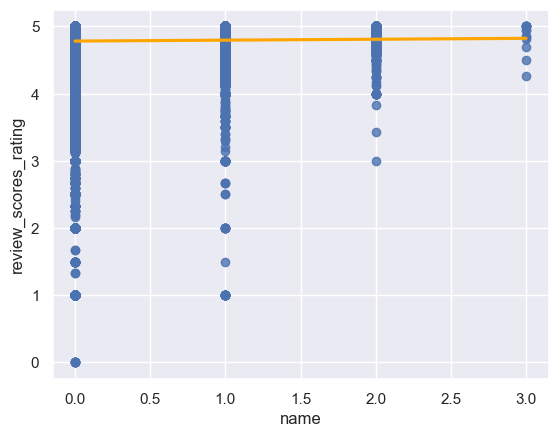

In [355]:
sns.regplot(
    x=df['name'].str.count('private|cozy|retreat'),
    y=df['review_scores_rating'],
    line_kws=dict(color="orange")
)

In [40]:
from sklearn.base import BaseEstimator, TransformerMixin
class SubstringsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, substrings):
        self.substrings = substrings
        self.substrings_regex = "|".join(substrings)

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        if isinstance(X, (pd.DataFrame)):
            return X.map(self._count_substrings).to_numpy()
        elif isinstance(X, (pd.Series)):
            return pd.DataFrame(X.apply(self._count_substrings)).to_numpy()
        else:
            raise ValueError(f"Unsupported data type: {type(X)}")
        
    def _count_substrings(self, s):
        if not isinstance(s, str):
            s = str(s)
        return len(re.findall(self.substrings_regex, s))

In [317]:
trans = SubstringsTransformer(['private','cozy','retreat'])
trans.fit_transform(df[['name']].astype(str)).mean()

np.float64(0.033259505182551996)

In [33]:
good_name_df = count_words(df_good, 'name')
all_name_df = count_words(df, 'name')

# Merge the dataframes
name_df = (pd.merge(
    good_name_df, all_name_df, 
    on='word',
    how='outer', 
    suffixes=('_good','_all')
)
    .sort_values(by='count_good', ascending=False)
)

name_df.head(200)

,word,count_good,count_prop_good,rank_good,count_all,count_prop_all,rank_all
16338,in,2973.0,0.027643,1.0,37581,0.026288,1.0
23488,private,2496.0,0.023208,2.0,23470,0.016417,2.0
28152,to,2064.0,0.019191,3.0,23467,0.016415,3.0
27935,the,1975.0,0.018364,4.0,21632,0.015132,4.0
15708,home,1474.0,0.013706,5.0,20676,0.014463,6.0
...,...,...,...,...,...,...,...
8480,brooklyn,95.0,0.000883,195.5,2216,0.001550,114.0
7338,bdrm,95.0,0.000883,195.5,1597,0.001117,158.0
14976,hale,94.0,0.000874,198.0,950,0.000665,244.0
5843,all,93.0,0.000865,200.5,1046,0.000732,221.0


In [34]:
name_df.to_csv("name_words.csv")

### Feature 2: Length of Amenities


<Axes: xlabel='amenities', ylabel='review_scores_rating'>

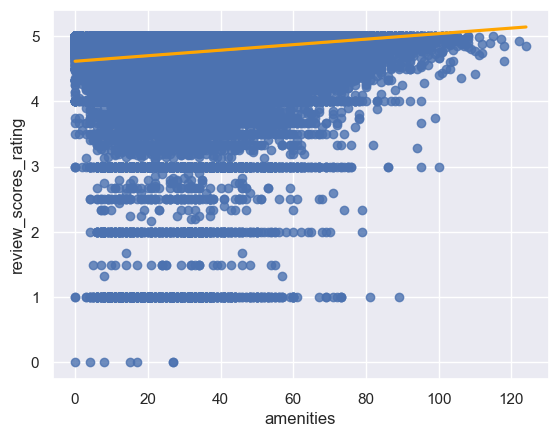

In [353]:
sns.regplot(
    x=df['amenities'].apply(len),
    y=df['review_scores_rating'],
    line_kws=dict(color="orange")
)

In [326]:
class LengthTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        if isinstance(X, (pd.DataFrame)):
            return X.map(len).to_numpy()
        elif isinstance(X, (pd.Series)):
            return pd.DataFrame(X.apply(len)).to_numpy()
        else:
            raise ValueError(f"Unsupported data type: {type(X)}")

In [328]:
trans = LengthTransformer()
trans.fit_transform(df['amenities']).mean()

np.float64(40.02224514322815)

### Feature 3: Host Verifications

Length of host verifications. Consider OHE.

In [11]:
df['host_verifications'].value_counts()

host_verifications
[email, phone]                              170359
[email, phone, work_email]                   30482
[phone]                                      15112
[phone, work_email]                            999
[email]                                        141
[]                                              59
[email, work_email]                             10
[email, phone, photographer]                     8
[email, phone, photographer, work_email]         1
Name: count, dtype: int64

<Axes: xlabel='host_verifications', ylabel='review_scores_rating'>

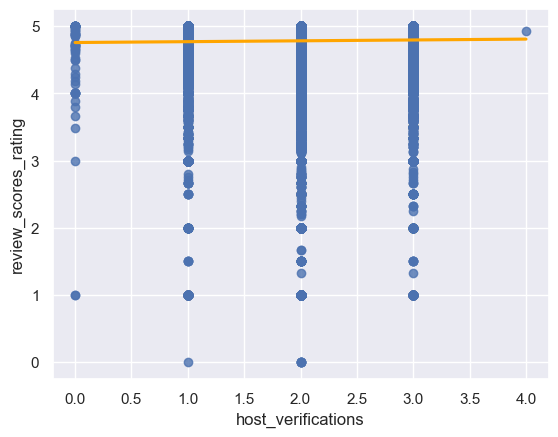

In [354]:
sns.regplot(
    x=df['host_verifications'].apply(lambda x: 0 if x is np.nan else len(x)),
    y=df['review_scores_rating'],
    line_kws=dict(color="orange")
)

### Feature 4: Description

In [13]:
df['description'].iloc[0]

"The apartment is located in a quiet neighborhood . Fully furnished. Linens and towels are provided. It's two blocks away from downtown Albany, and the Palace theater."

In [26]:
df_good = df[(df['review_scores_rating'] >= 4.9) & (df['number_of_reviews'] >= 100)]
df_good.shape # Number of really good listings based on our definition

(16161, 53)

In [27]:
def count_words(df_here, col):
    """ Counts ths number of words in the given col and DataFrame """
    # Count most common words as proportions in the good listings
    text = ' '.join(df_here[col].convert_dtypes(str).dropna())
    words = re.findall(r'\b\w+\b', text.lower())
    name_count = Counter(words)

    # Convert to dataframe
    name_df = (pd.DataFrame.from_dict(
        name_count, 
        orient='index', 
        columns=['count']
    )   
        .reset_index()
        .rename(columns={'index': 'word'})
        .sort_values(by='count', ascending=False)
    )

    # Normalize as proportion and add rank
    name_df['count_prop'] = name_df['count'] / name_df['count'].sum()
    name_df['rank'] = name_df['count_prop'].rank(ascending=False)

    return name_df

good_desc_df = count_words(df_good, 'description')
all_desc_df = count_words(df, 'description')

# Merge the dataframes
desc_df = (pd.merge(
    good_desc_df, all_desc_df, 
    on='word',
    how='outer', 
    suffixes=('_good','_all')
)
    .sort_values(by='count_good', ascending=False)
)

desc_df.head(200)

,word,count_good,count_prop_good,rank_good,count_all,count_prop_all,rank_all
51964,the,46068.0,0.038441,1.0,548240,0.038686,1.0
9508,and,44155.0,0.036844,2.0,528386,0.037285,2.0
7906,a,33236.0,0.027733,3.0,382937,0.027021,4.0
13588,br,32005.0,0.026706,4.0,401361,0.028322,3.0
52557,to,30563.0,0.025503,5.0,356066,0.025125,5.0
...,...,...,...,...,...,...,...
49582,st,943.0,0.000787,196.0,7901,0.000558,291.0
45043,right,942.0,0.000786,197.0,12580,0.000888,182.0
45875,safe,936.0,0.000781,198.0,10160,0.000717,216.0
15638,centrally,932.0,0.000778,199.0,18636,0.001315,121.0


In [28]:
desc_df.to_csv("desc_words.csv")

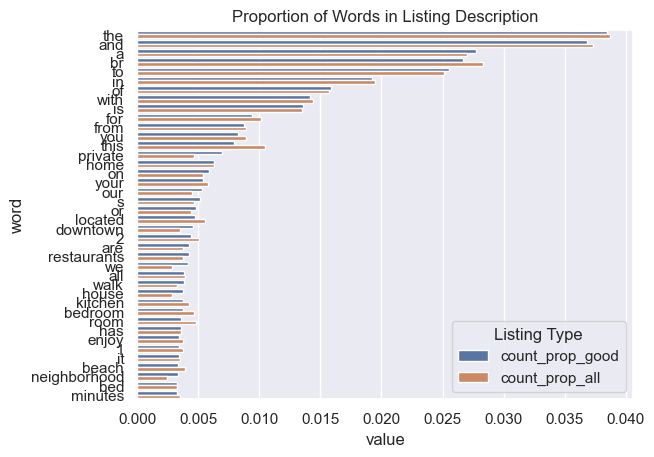

In [366]:
desc_melted_df = desc_df.head(40).melt(
    id_vars='word',
    value_vars=['count_prop_good','count_prop_all'],
    var_name='Listing Type',
    value_name='value'
)

ax = sns.barplot(
    desc_melted_df,
    x='value',
    y='word',
    hue='Listing Type',
)

ax.set_title('Proportion of Words in Listing Description')

plt.show()

In [38]:
desc_meaningful = [
    'private', 
    'home', 
    'downtown', 
    'restaurants', 
    'house', 
    'kitchen', 
    'bedroom', 
    'room',
    'beach',
    'neighborhood',
    'bed',
    'parking',
    'apartment',
    'quiet',
    'bathroom',
    'coffee',
    'new',
    'modern',
    'walking',
    'shops',
    'distance',
    'city',
    'beautiful',
    'close',
    'perfect',
    'tv',
    'cozy',
    'guests',
    'studio',
    'spacious',
    'suite',
    'comfortable',
    'views',
    'unit',
    'bars',
    'patio',
    'renovated',
    'airport',
    'outdoor',
    'best',
    'wifi',
    'garden',
    'dining',
    'relax',
    'newly',
    'family',
    'pool',
    'shopping',
    'ocean',
    'amenities',
    'light',
    'clean',
    'local',
    'deck',
    'bedrooms',
    'backyard',
    'condo',
    'dryer',
    'cottage',
    'shower',
    'washer',
    'king',
    'love',
    'friendly',
    'tub',
    'remodeled',
    'beds',
    'charming',
    'safe',
    'yard',
    'bus',
    'lake',
    'sofa',
    'beaches',
    'music',
    'peaceful',
    'town',
    'kitchenette',
    'luxury'
]

In [42]:
trans = SubstringsTransformer(desc_meaningful)
desc_transformed = trans.fit_transform(df[['description']])

<Axes: ylabel='review_scores_rating'>

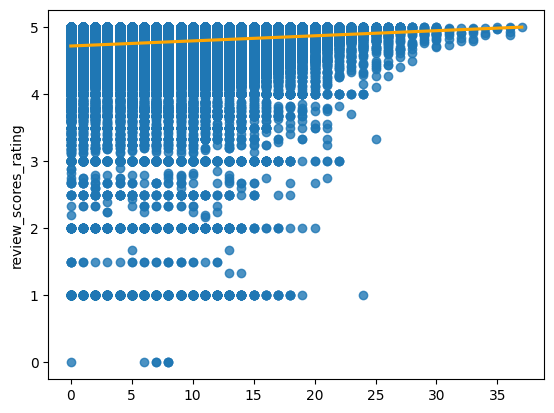

In [43]:
sns.regplot(
    x=desc_transformed,
    y=df['review_scores_rating'],
    line_kws=dict(color="orange")
)

### Feature 5: Host About

In [35]:
good_about_df = count_words(df_good, 'host_about')
all_about_df = count_words(df, 'host_about')

# Merge the dataframes
about_df = (pd.merge(
    good_about_df, all_about_df, 
    on='word',
    how='outer', 
    suffixes=('_good','_all')
)
    .sort_values(by='count_good', ascending=False)
)

about_df.head(200)

,word,count_good,count_prop_good,rank_good,count_all,count_prop_all,rank_all
3082,and,43551.0,0.050905,1.0,412018,0.046149,1.0
19559,i,28897.0,0.033776,2.0,243780,0.027305,4.0
39689,to,27671.0,0.032343,3.0,296822,0.033246,2.0
39257,the,25110.0,0.029350,4.0,247198,0.027688,3.0
1510,a,20423.0,0.023871,5.0,212610,0.023814,5.0
...,...,...,...,...,...,...,...
19161,hospitality,607.0,0.000709,196.0,9984,0.001118,132.0
512,2,606.0,0.000708,197.0,5383,0.000603,238.0
28869,outdoors,605.0,0.000707,198.0,3908,0.000438,314.0
16056,free,601.0,0.000702,199.5,10967,0.001228,119.5


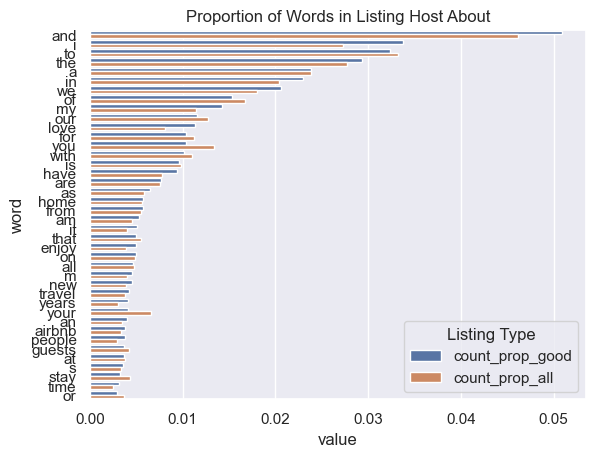

In [371]:
about_melted_df = about_df.head(40).melt(
    id_vars='word',
    value_vars=['count_prop_good','count_prop_all'],
    var_name='Listing Type',
    value_name='value'
)

ax = sns.barplot(
    about_melted_df,
    x='value',
    y='word',
    hue='Listing Type',
)

ax.set_title('Proportion of Words in Listing Host About')

plt.show()

In [ ]:
model = SubstringsTransformer()

### Feature 6: Property Type

OHE

In [17]:
df['property_type'].unique()

array(['Entire rental unit', 'Entire home', 'Private room in home',
       'Private room in rental unit', 'Entire place',
       'Private room in guest suite', 'Entire guest suite', 'Entire loft',
       'Entire serviced apartment', 'Room in aparthotel', 'Entire condo',
       'Entire townhouse', 'Entire vacation home', 'Entire cottage',
       'Private room in townhouse', 'Private room in bed and breakfast',
       'Room in hotel', 'Entire guesthouse', 'Shared room in rental unit',
       'Shared room in hostel', 'Private room in cabin', 'Tiny home',
       'Private room in bungalow', 'Entire bungalow', 'Entire cabin',
       'Private room in cottage', 'Private room', 'Yurt', 'Camper/RV',
       'Barn', 'Private room in religious building', 'Entire chalet',
       'Farm stay', 'Private room in farm stay', 'Room in boutique hotel',
       'Campsite', 'Treehouse', 'Private room in treehouse',
       'Private room in hostel', 'Private room in guesthouse',
       'Entire villa', 'Tent', '

In [379]:
from sklearn.preprocessing import OneHotEncoder
mdl = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),
    LinearRegression()
)

mdl.fit(df[['property_type']],df['review_scores_rating'])
mdl.score(df[['property_type']],df['review_scores_rating'])
# This is r^2 score, from bad (0) to perfect (1), see below much better than room type

0.02993098364575919

### Feature 7: Room Type

In [23]:
df.room_type.value_counts()

room_type
Entire home/apt    169923
Private room        44957
Shared room          1410
Hotel room            881
Name: count, dtype: int64

In [378]:
mdl.fit(df[['room_type']],df['review_scores_rating'])
mdl.score(df[['room_type']],df['review_scores_rating'])

0.009426732792224835

### Feature 8: Host Since

In [400]:
host_weeks = (pd.Timestamp('2024-07-31') - df['host_since']) / pd.Timedelta(weeks=1)
host_weeks.describe()

count    217164.000000
mean        378.767246
std         173.662443
min           5.285714
25%         255.142857
50%         405.000000
75%         502.857143
max         856.285714
Name: host_since, dtype: float64

<Axes: xlabel='host_since', ylabel='review_scores_rating'>

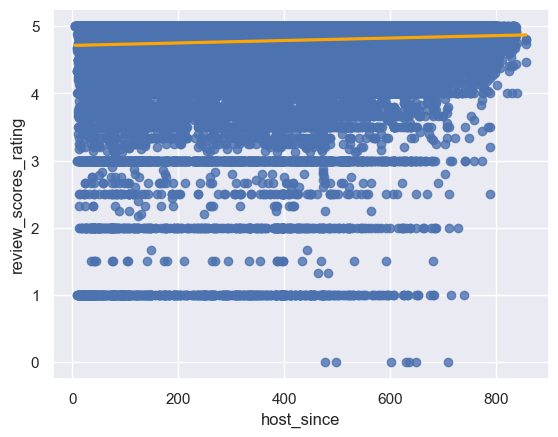

In [401]:
sns.regplot(
    x=host_weeks,
    y=df['review_scores_rating'],
    line_kws=dict(color="orange")
)

### Feature 9: Host Response Time

In [21]:
df['host_response_time'].value_counts()

host_response_time
within an hour        155557
within a few hours     20263
within a day            9249
a few days or more      2939
Name: count, dtype: int64

In [383]:
df['host_response_time'].value_counts(), df['host_response_rate'].describe()

(host_response_time
 within an hour        155557
 within a few hours     20263
 within a day            9249
 a few days or more      2939
 Name: count, dtype: int64,
 count    188008.000000
 mean          0.969212
 std           0.122377
 min           0.000000
 25%           1.000000
 50%           1.000000
 75%           1.000000
 max           1.000000
 Name: host_response_rate, dtype: float64)

In [385]:
mdl.fit(df[['host_response_time']],df['review_scores_rating'])
mdl.score(df[['host_response_time']],df['review_scores_rating'])

0.002128186367516438

### Feature 10: Host Profile Pic

Not at all impactful

In [409]:
df['host_has_profile_pic'].value_counts()

host_has_profile_pic
True     214390
False      2774
Name: count, dtype: int64

In [410]:
mdl.fit(df[['host_has_profile_pic']],df['review_scores_rating'])
mdl.score(df[['host_has_profile_pic']],df['review_scores_rating'])

0.0006544772136575228

### Model Pipeline

In [22]:
preproc = make_column_transformer(
    (Binarizer(threshold=2), ['size']),
    (OneHotEncoder(), ['sex', 'smoker', 'day', 'time']),
    (SubstringsTransformer(['private']), ['description']),
    remainder='passthrough',
)

pl = make_pipeline(preproc, LinearRegression())
# Notice that the steps in the pipeline and column transformer are
# automatically named
pl

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3912223597.py, line 4)

In [315]:
preproc = make_column_transformer(
    (SubstringsTransformer(['private','cozy','retreat']), ['name'])
)

model = make_pipeline(
    preproc,
    SimpleImputer(missing_values=np.nan, strategy='mean'),
    LinearRegression()
)

model.fit(
    df[['name']],
    df['price'].fillna(df['price'].mean())
)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('substringstransformer',
                                                  SubstringsTransformer(substrings=['private',
                                                                                    'cozy',
                                                                                    'retreat']),
                                                  ['name'])])),
                ('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

In [17]:
numericals = df.select_dtypes(np.number).drop(columns=['review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value']).columns
numericals = np.array(numericals)
numericals

array(['host_response_rate', 'host_acceptance_rate',
       'host_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype=object)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    df.select_dtypes(np.number).drop(columns=['review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value']),
    df['review_scores_rating'],
    test_size=0.2,
    random_state=42
)

In [36]:
for subset in itertools.combinations(numericals, num_features):
    print(subset[0])

host_response_rate
host_acceptance_rate
host_listings_count
latitude
longitude
accommodates
bathrooms
bedrooms
beds
price
minimum_nights
maximum_nights
minimum_nights_avg_ntm
maximum_nights_avg_ntm
availability_30
availability_60
availability_90
availability_365
number_of_reviews
number_of_reviews_ltm
number_of_reviews_l30d
calculated_host_listings_count
calculated_host_listings_count_entire_homes
calculated_host_listings_count_private_rooms
calculated_host_listings_count_shared_rooms
reviews_per_month


In [40]:
import itertools

results = {}

for num_features in range(1,4):
    for subset in itertools.combinations(numericals, num_features):
        
        model = make_pipeline(
            SimpleImputer(missing_values=np.nan, strategy='mean'),
            LinearRegression()
        )

        model.fit(X_train[list(subset)], y_train)

        y_test_pred = model.predict(X_test[list(subset)])
        y_train_pred = model.predict(X_train[list(subset)])

        results[subset] = (mean_squared_error(y_train_pred, y_train), mean_squared_error(y_test_pred, y_test))


In [56]:
results_df = pd.DataFrame.from_dict(
    results
).T

results_df.columns = ['test','train']
results_df = results_df.reset_index().sort_values(by='train', ascending=False)
results_df.reset_index(drop=True)

,level_0,level_1,level_2,test,train
0,latitude,maximum_nights,NaN,0.139177,0.136954
1,latitude,NaN,NaN,0.139184,0.136954
2,maximum_nights,NaN,NaN,0.139180,0.136952
3,latitude,price,maximum_nights,0.139170,0.136940
4,latitude,price,NaN,0.139177,0.136939
...,...,...,...,...,...
2946,host_listings_count,availability_30,reviews_per_month,0.134545,0.131866
2947,host_listings_count,availability_30,number_of_reviews_ltm,0.134324,0.131828
2948,host_listings_count,availability_60,number_of_reviews_l30d,0.134454,0.131820
2949,host_listings_count,availability_60,reviews_per_month,0.134551,0.131788


In [59]:
results_df.sort_values(by='test')

,level_0,level_1,level_2,test,train
1118,host_listings_count,availability_30,number_of_reviews_ltm,0.134324,0.131828
1128,host_listings_count,availability_60,number_of_reviews_ltm,0.134325,0.131754
2766,availability_30,number_of_reviews_ltm,calculated_host_listings_count,0.134336,0.131987
2811,availability_60,number_of_reviews_ltm,calculated_host_listings_count,0.134370,0.131953
1119,host_listings_count,availability_30,number_of_reviews_l30d,0.134441,0.131882
...,...,...,...,...,...
105,latitude,maximum_nights,NaN,0.139177,0.136954
103,latitude,price,NaN,0.139177,0.136939
11,maximum_nights,NaN,NaN,0.139180,0.136952
9,price,NaN,NaN,0.139181,0.136937


In [65]:
results_df[results_df['level_1'].isnull()].sort_values(by='test')

,level_0,level_1,level_2,test,train
21,calculated_host_listings_count,NaN,NaN,0.137157,0.134688
2,host_listings_count,NaN,NaN,0.137308,0.134667
14,availability_30,NaN,NaN,0.137592,0.135376
19,number_of_reviews_ltm,NaN,NaN,0.137605,0.135485
15,availability_60,NaN,NaN,0.137681,0.135385
20,number_of_reviews_l30d,NaN,NaN,0.137761,0.135596
25,reviews_per_month,NaN,NaN,0.137893,0.135570
22,calculated_host_listings_count_entire_homes,NaN,NaN,0.137898,0.135516
16,availability_90,NaN,NaN,0.137908,0.135632
18,number_of_reviews,NaN,NaN,0.138202,0.136013


In [57]:
results_df['test'].describe()

count    2951.000000
mean        0.137225
std         0.000972
min         0.134324
25%         0.136575
50%         0.137286
75%         0.137824
max         0.139184
Name: test, dtype: float64

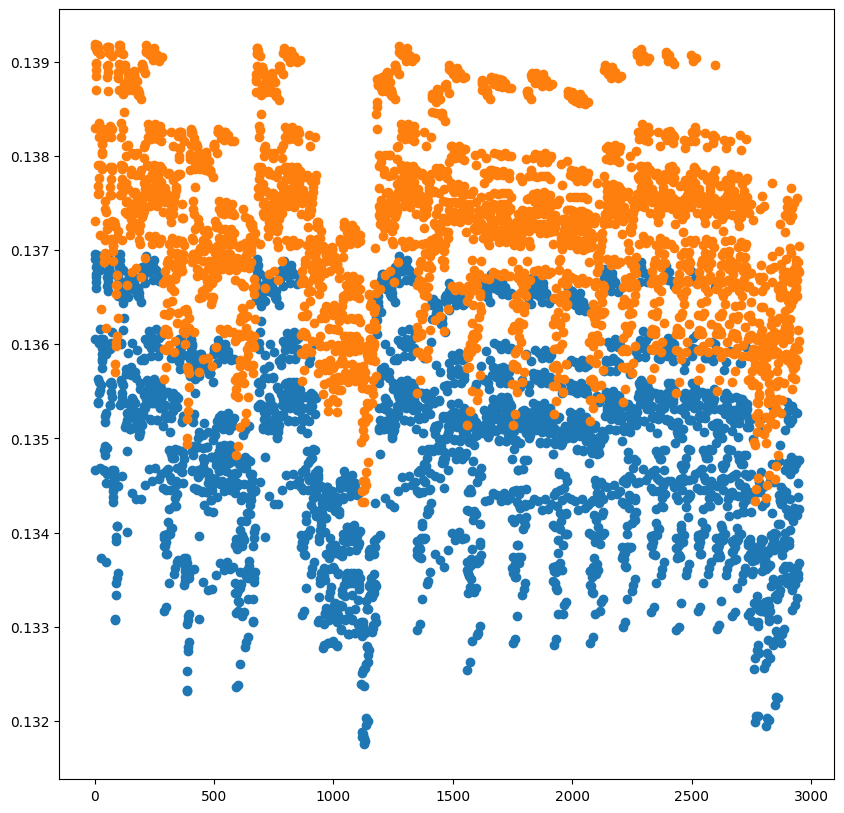

In [58]:
plt.figure(figsize=(10,10))

plt.scatter(x=results_df.index, y=results_df['train'])
plt.scatter(x=results_df.index, y=results_df['test'])

plt.show()

In [ ]:
mean_absolute_error(y_test, y_pred)

In [ ]:
model.named_steps['linearregression'].coef_

In [ ]:
coefs = pd.DataFrame({
    "Features" : df.select_dtypes(np.number).drop(columns=['review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value']).columns,
    "Coefficients" : model.named_steps['linearregression'].coef_
}).sort_values(by='Coefficients')

ax = coefs.plot(kind='scatter',x='Features',y='Coefficients')
ax.set_xticklabels(coefs['Features'], rotation=90)

...